In [19]:
from __future__ import annotations

import argparse
import os
import numpy as np
import pandas as pd

from sp_eyegan.model import eventGAN as eventGAN
import matplotlib.pyplot as plt

from sp_eyegan.model import stat_scanpath_model as stat_scanpath_model

In [2]:
GPU = 0
data_dir = 'data/'
num_samples = 1000
output_window_size = 5000
sac_window_size = 10
fix_window_size = 10
scanpath_model = 'average'

task_ids = []
task = '1'
if task == 'all':
    task_ids = [1, 2, 3, 4]
else:
    task_ids.append(int(task))

video_no = '1'
video_ids = []
if video_no == 'all':
    video_ids = [i + 1 for i in range(15)]
else:
    video_ids.append(int(video_no))

# params for stimulus
expt_txt = {'px_x': 1680,
            'px_y': 1050,
            'max_dva_x': 30,
            'max_dva_y': 25
            }

# params for NN
random_size = 32
window_size = 10
gen_kernel_sizes_fixation = [fix_window_size, 8, 4, 2]
gen_kernel_sizes_saccade = [sac_window_size, 8, 4, 2]
gen_filter_sizes = [16, 8, 4, 2]
channels = 2
relu_in_last = False
batch_size = 256

dis_kernel_sizes = [8, 16, 32]
dis_fiter_sizes = [32, 64, 128]
dis_dropout = 0.3

sample_size = 1000

# params for generator
window_size = 10
random_size = 32
channels = 2
mean_sacc_len = 20
std_sacc_len = 10

mean_fix_len = 25
std_fix_len = 15

fixation_path = '../event_model/fixation_model_ehtask_giw_video_' + video_no + '_task_' + task
saccade_path = '../event_model/saccade_model_ehtask_giw_video_' + video_no + '_task_' + task

data_suffix = ''

model_config_fixation = {'gen_kernel_sizes': gen_kernel_sizes_fixation,
                                 'gen_filter_sizes': gen_filter_sizes,
                                 'dis_kernel_sizes': dis_kernel_sizes,
                                 'dis_fiter_sizes': dis_fiter_sizes,
                                 'dis_dropout': dis_dropout,
                                 'window_size': fix_window_size,
                                 'channels': channels,
                                 'batch_size': batch_size,
                                 'random_size': random_size,
                                 'relu_in_last': relu_in_last,
                                 }

model_config_saccade = {'gen_kernel_sizes': gen_kernel_sizes_saccade,
                                'gen_filter_sizes': gen_filter_sizes,
                                'dis_kernel_sizes': dis_kernel_sizes,
                                'dis_fiter_sizes': dis_fiter_sizes,
                                'dis_dropout': dis_dropout,
                                'window_size': sac_window_size,
                                'channels': channels,
                                'batch_size': batch_size,
                                'random_size': random_size,
                                'relu_in_last': relu_in_last,
                                }

gan_config = {'window_size': window_size,
              'random_size': random_size,
              'channels': channels,
              'mean_sacc_len': mean_sacc_len,
              'std_sacc_len': std_sacc_len,
              'mean_fix_len': mean_fix_len,
              'std_fix_len': std_fix_len,
              'fixation_path': fixation_path,
              'saccade_path': saccade_path,
              }

flag_train_on_gpu = 1
if flag_train_on_gpu == 1:
    flag_train_on_gpu = True
else:
    flag_train_on_gpu = False

# set up GPU
if flag_train_on_gpu:
    import tensorflow as tf
    # select graphic card
    os.environ['CUDA_VISIBLE_DEVICES'] = str(GPU)
    os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
    config = tf.compat.v1.ConfigProto(log_device_placement=True)
    config.gpu_options.per_process_gpu_memory_fraction = 1.
    config.gpu_options.allow_growth = True
    tf_session = tf.compat.v1.Session(config=config)
else:
    import tensorflow as tf
    # select graphic card
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

data_generator = eventGAN.dataGenerator(gan_config,
                                        model_config_fixation,
                                        model_config_saccade,
                                        )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
scanpath_file = '../data/scanpath/scanpath_ehtask_video_' + video_no + '_task_' + task + '.npy'
scanpath = np.load(scanpath_file)
frame_no = scanpath[:, 0]
x_dva = scanpath[:, 1]
y_dva = scanpath[:, 2]

x_locations, y_locations, fix_x_loc, fix_y_loc, sac_x_loc, sac_y_loc = data_generator.sample_scanpath(
    x_fix_locations=x_dva,
    y_fix_locations=y_dva,
    num_sample_saccs=1000,
    dva_threshold=2.7,
    fixation_durations=None,
    saccade_durations=None,
)

In [20]:
import matplotlib.pyplot as plt

def create_scatter_plot(x, y):
    plt.figure(figsize=(12, 9))
    plt.scatter(x, y, marker='.')  # 'o' specifies the marker style (circle)
    
    # Set the x and y axis limits
    plt.xlim(-180, 180)
    plt.ylim(-90, 90)

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot')

    plt.show()

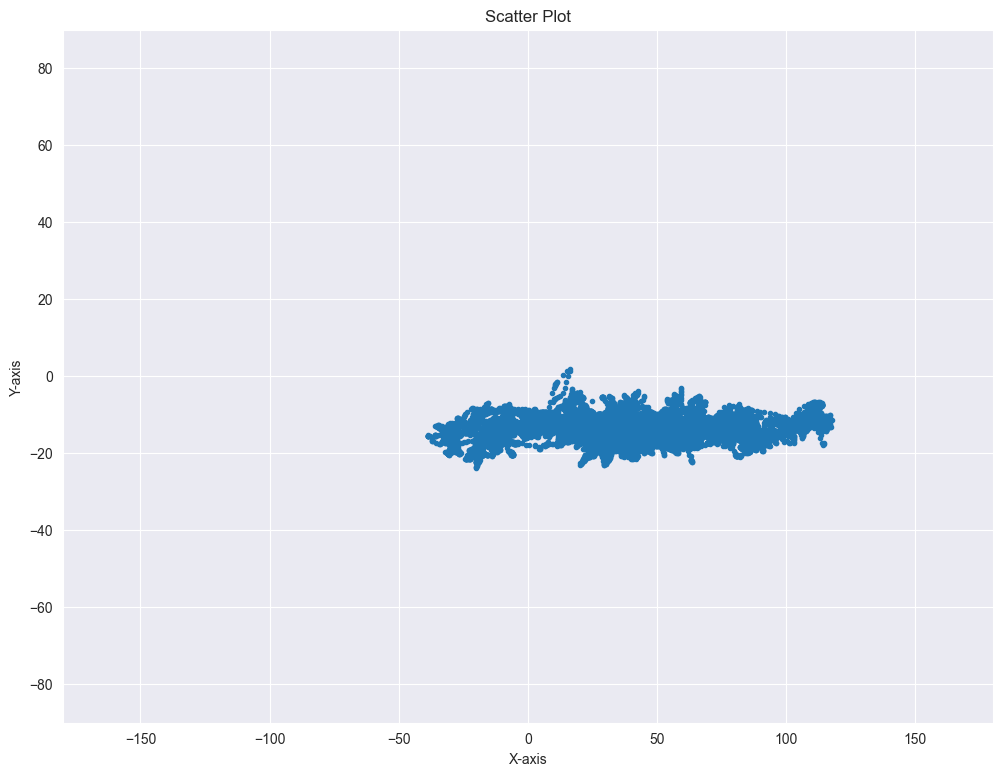

In [22]:
create_scatter_plot(x_locations, y_locations)

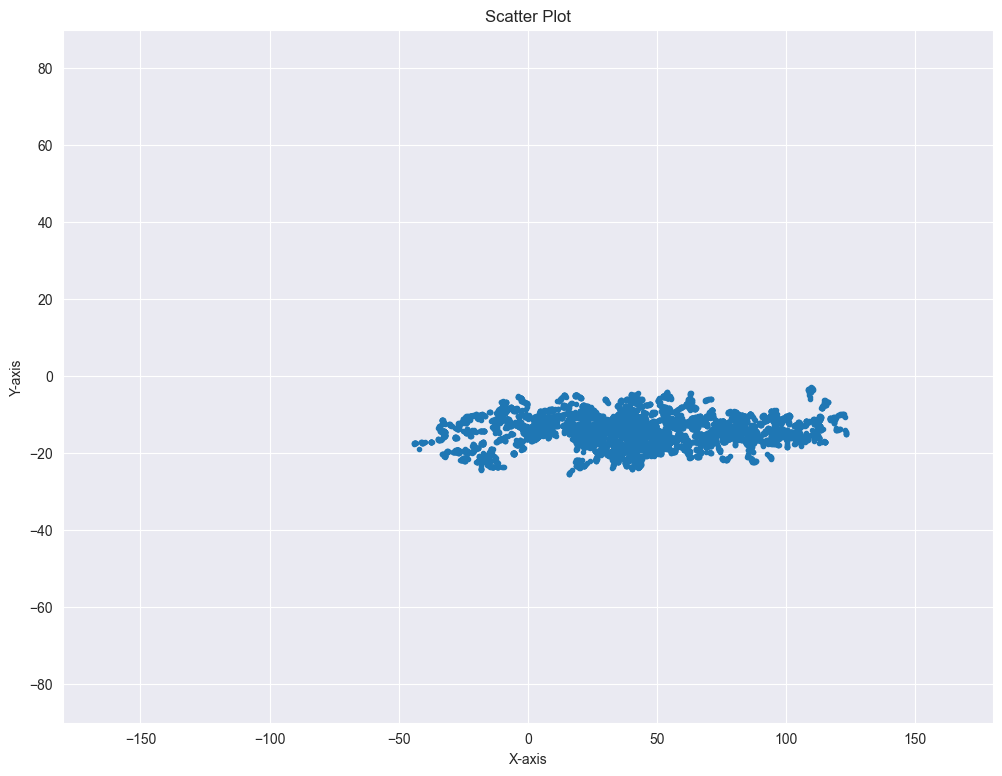

In [21]:
create_scatter_plot(fix_x_loc, fix_y_loc)

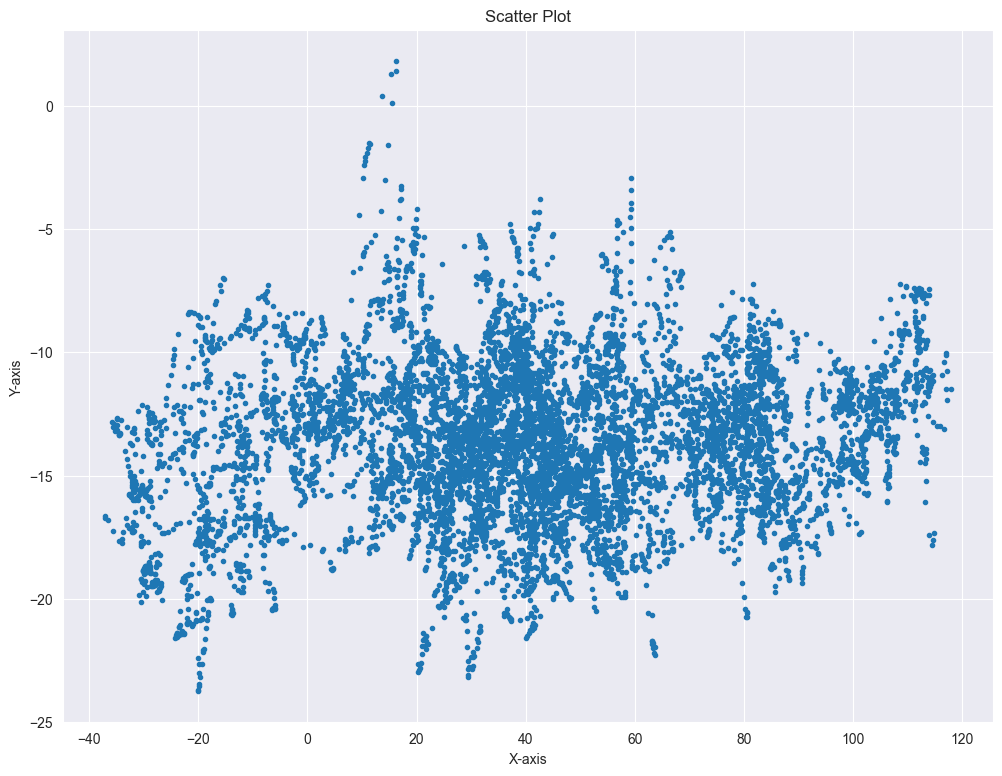

In [19]:
create_scatter_plot(sac_x_loc, sac_y_loc)

In [4]:
print(len(x_locations), len(y_locations), len(fix_x_loc), len(fix_y_loc), len(sac_x_loc), len(sac_y_loc))

19933 19933 426 426 426 426


In [16]:
sac_x_loc[100]

[74.97473444426886,
 75.2604122129868,
 75.66728540644483,
 75.7387462859565,
 75.44773503277574,
 75.26384333127271,
 75.46187460941628,
 76.82194461730442,
 79.56962416613023,
 83.08857203252349,
 82.9338283241211,
 82.70635880437662,
 82.45933844810965,
 82.21839750162083,
 81.93016455860142,
 81.68535862285992,
 81.50028208952456,
 81.22524785106017,
 80.31641142360834,
 78.85915925953981,
 78.57174386950871,
 78.35215614817949]

In [5]:
np.array(sac_y_loc).shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (426,) + inhomogeneous part.

In [27]:
from itertools import chain

def create_scatter_plot(fix_x_loc, fix_y_loc, sac_x_loc, sac_y_loc, n=None):
    plt.figure(figsize=(12, 9))
    if n is not None:
        fix_x_loc = fix_x_loc[0:n]
        fix_y_loc = fix_y_loc[0:n]
        sac_x_loc = sac_x_loc[0:n]
        sac_y_loc = sac_y_loc[0:n]
        
    fix_x_loc = list(chain(*fix_x_loc))
    fix_y_loc = list(chain(*fix_y_loc))
    sac_x_loc = list(chain(*sac_x_loc))
    sac_y_loc = list(chain(*sac_y_loc))
    
    plt.scatter(fix_x_loc, fix_y_loc, marker='.', c=['red'])  # 'o' specifies the marker style (circle)
    plt.scatter(sac_x_loc, sac_y_loc, marker='.', c=['blue'])
    
    # Set the x and y axis limits
    # plt.xlim(-180, 180)
    # plt.ylim(-90, 90)

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot')

    plt.show()

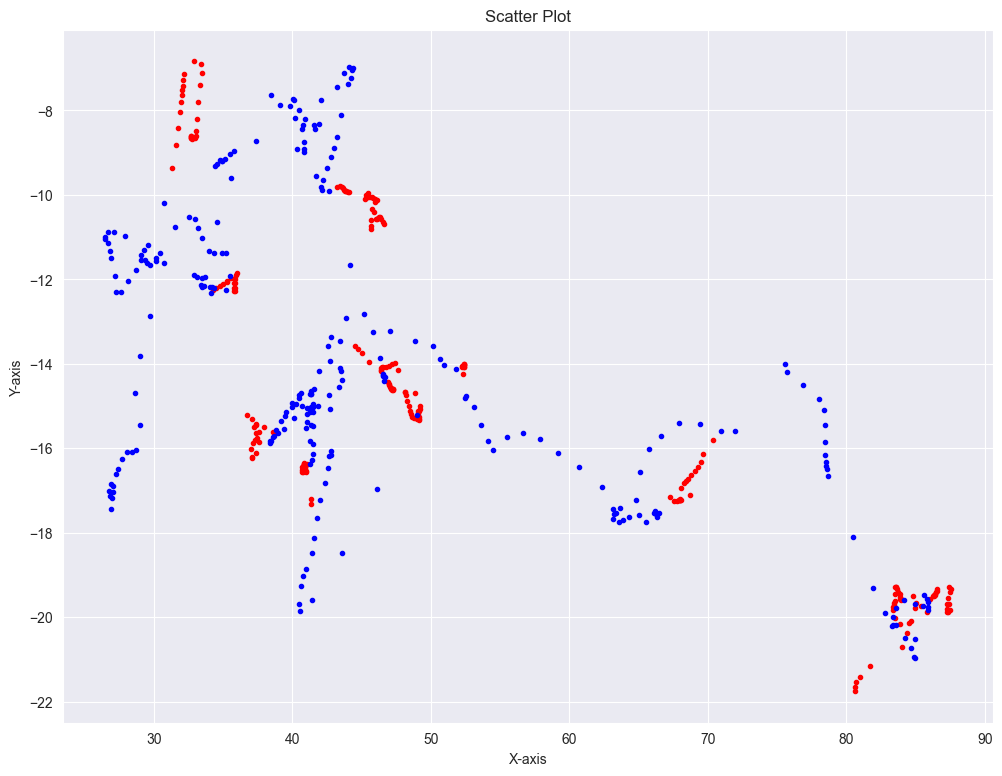

In [30]:
create_scatter_plot(fix_x_loc, fix_y_loc, sac_x_loc, sac_y_loc, 10)

In [31]:
len(fix_x_loc)

426

In [34]:
l = 1000
for i in range(len(sac_y_loc)):
    print(len(sac_y_loc[i]))
    l = min(l, len(sac_y_loc[i]))
l

12
21
35
16
15
47
25
33
35
25
31
17
14
15
21
30
25
19
33
22
6
27
34
18
25
21
24
29
17
21
18
23
10
19
12
27
9
27
17
7
12
28
5
20
26
26
14
20
13
6
25
7
11
34
12
23
25
23
22
25
13
11
14
25
28
18
20
28
20
26
11
16
15
18
28
21
27
14
8
22
29
9
27
20
15
24
23
21
11
20
27
16
10
16
29
28
8
35
17
36
22
24
19
32
24
30
14
15
21
33
6
8
21
35
8
21
12
17
36
25
13
27
41
27
24
34
14
14
35
35
13
15
37
12
16
6
11
19
16
14
33
30
18
28
15
11
16
15
25
16
23
33
26
24
21
15
12
36
5
17
2
29
19
22
28
26
33
16
33
18
16
21
23
8
49
31
46
7
27
36
8
5
27
8
11
12
13
20
27
17
7
23
25
18
14
13
30
21
17
25
11
17
8
25
36
33
29
41
19
21
25
17
9
22
29
20
24
17
26
10
31
18
18
16
17
13
11
22
20
11
12
20
30
23
23
22
12
41
32
9
23
7
11
21
14
19
25
27
8
26
12
49
1
19
25
26
12
30
16
28
14
27
20
9
11
16
21
24
11
20
10
21
24
18
27
37
29
21
19
12
28
22
24
9
30
4
29
21
6
25
11
3
37
11
21
29
28
14
18
33
8
23
5
27
14
34
26
19
12
11
13
22
30
8
15
16
29
14
25
18
12
23
15
17
26
8
24
31
33
16
20
20
32
43
31
15
36
37
30
26
22
10
12
23
14
3

1